# <a id='toc1_'></a>[Anas Submission](#toc0_)

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce  # Import category_encoders and alias it as ce
from imblearn.over_sampling import ADASYN

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

**Table of contents**<a id='toc0_'></a>    
- [Anas Submission](#toc1_)    
- [Understanding the Data](#toc2_)    
  - [What is considered as a fraudulent banking operation ?](#toc2_1_)    
  - [Load Data](#toc2_2_)    
  - [Target distribution](#toc2_3_)    
- [Pre-Processing](#toc3_)    
  - [Transform into a long format](#toc3_1_)    
  - [Split the data](#toc3_2_)    
  - [Encoding](#toc3_3_)    
- [Predictions and experimentations](#toc4_)    
  - [Logistic Classifier](#toc4_1_)    
  - [QDA CLassifier](#toc4_2_)    
  - [SVC](#toc4_3_)    
  - [XGBoost and Random Forest Classifier](#toc4_4_)    
- [Whole Pipeline & Y_Test generation](#toc5_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

----------

# <a id='toc2_'></a>[Understanding the Data](#toc0_)

## <a id='toc2_1_'></a>[What is considered as a fraudulent banking operation ?](#toc0_)

A fraudulent banking operation typically refers to any unauthorized or illegal activity conducted through a bank account or banking system. This can include a wide range of activities, such as:

1. **Identity Theft**: Using someone else's personal information to open accounts or make transactions.
2. **Account Takeover**: Gaining unauthorized access to someone else's account to make unauthorized transactions.
3. **Money Laundering**: Moving illegally obtained funds through the banking system to make them appear legitimate.
4. **Credit Card Fraud**: Using stolen credit card information to make unauthorized purchases.
5. **Phishing**: Deceptive attempts to obtain sensitive information such as usernames, passwords, and credit card details by masquerading as a trustworthy entity.
6. **Wire Fraud**: Using electronic communications to defraud individuals or entities of money.
7. **Check Fraud**: Using counterfeit or altered checks to withdraw funds from an account.
8. **Loan Fraud**: Providing false information to obtain a loan or using loan proceeds for unauthorized purposes.


## <a id='toc2_2_'></a>[Load Data](#toc0_)

In [13]:
# Let's load our dataset in numpy arrays

# for visualization, we also load them in a pandas dataframes

# Load the dataset
X_train_df = pd.read_csv('X_train.csv')
Y_train_df = pd.read_csv('Y_train.csv')
X_test_df = pd.read_csv('X_test.csv')
Y_test_df = pd.read_csv('Y_test.csv')


C:\Users\asus\AppData\Local\Temp\ipykernel_82792\1872497572.py:6: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train_df = pd.read_csv('X_train.csv')
C:\Users\asus\AppData\Local\Temp\ipykernel_82792\1872497572.py:8: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  X_test_df = pd.read_csv('X_test.csv')


In [14]:
X_train_df

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,77846,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
92786,45891,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
92787,42613,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
92788,43567,COMPUTERS,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [15]:
Y_train_df.head()

,index,ID,fraud_flag
0,0,85517,0
1,1,51113,0
2,2,83008,0
3,3,78712,0
4,4,77846,0


In [16]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92790 entries, 0 to 92789
Columns: 146 entries, ID to Nb_of_items
dtypes: float64(49), int64(1), object(96)
memory usage: 103.4+ MB


## <a id='toc2_3_'></a>[Target distribution](#toc0_)

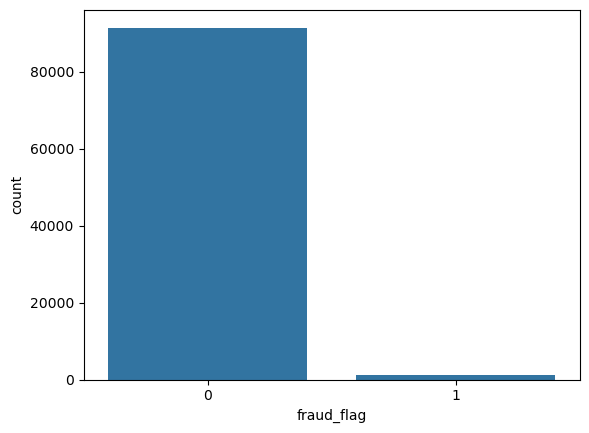

The fraud rate is:  1.4214893846319647 %


In [17]:
#Let's look at the target distribution

sns.countplot(x = 'fraud_flag',data = Y_train_df)
plt.show()

print("The fraud rate is: ", Y_train_df['fraud_flag'].sum()/Y_train_df['fraud_flag'].count()*100, "%")

- As expected from a **fraud detection problem**, our dataset suffers from a **Huge data imbalance !**. This is due to the fact that in real life, fraudulent transactions represents a very small fraction of all the operations that are being done.

- Each Row of our dataset represents a basket that can contain up to **24 different items**. But as we've seen on the previous dataframe, a lot data is missing (because of only 1 or 2 items being recorded on a lot of baskets).   
Let's take a closer look about `the presence of missing data.` 

<Axes: title={'center': 'Percentage of nan values for each item'}, ylabel='Percentage of nan values'>

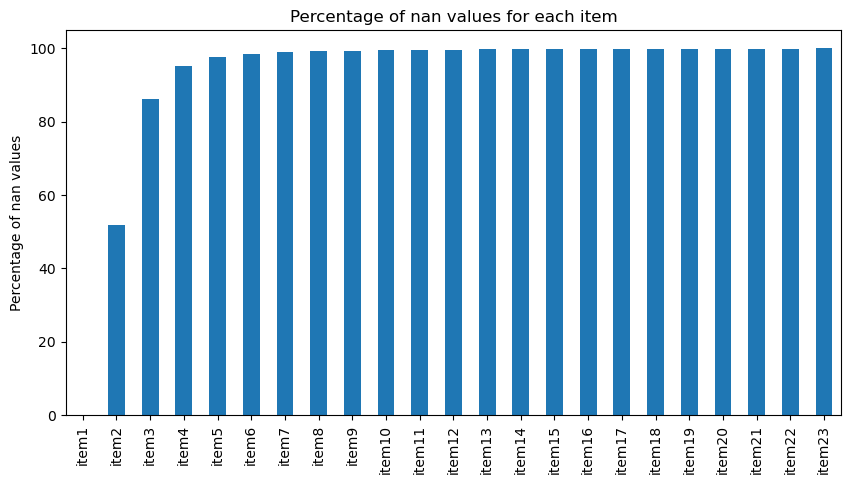

In [18]:
# Let's look at the evolution of the nan values in the dataset for the items

nan_values = X_train_df.iloc[:,1:24].isna().sum()
percentages = nan_values/len(X_train_df)*100
percentages.plot(kind='bar', figsize=(10,5), title='Percentage of nan values for each item',ylabel='Percentage of nan values')


<Axes: title={'center': 'Percentage of nan values for each item for frauds'}, ylabel='Percentage of nan values'>

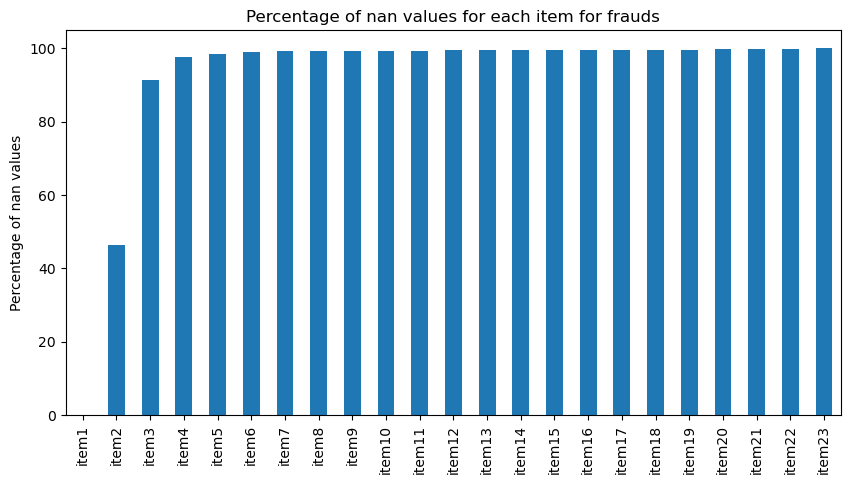

In [19]:
#Let's do the same thing but only for data with frauds

X_train_df_fraud = X_train_df.copy()
X_train_df_fraud['fraud_flag'] = Y_train_df['fraud_flag']
X_train_df_fraud = X_train_df[X_train_df_fraud['fraud_flag'] == 1]

nan_values = X_train_df_fraud.iloc[:,1:24].isna().sum()
percentages = nan_values/len(X_train_df_fraud)*100
percentages.plot(kind='bar', figsize=(10,5), title='Percentage of nan values for each item for frauds',ylabel='Percentage of nan values')





In [20]:
# Let's compute the proportion of NaN values in our dataset

nan_values = X_train_df.iloc[:, 1:24].isna().sum()

total_nan_values = nan_values.sum()

total_values = X_train_df.iloc[:, 1:24].size

proportion_nan_values = total_nan_values / total_values * 100

print("The proportion of NaN values in the dataset is: ", proportion_nan_values, "%")

The proportion of NaN values in the dataset is:  92.34765740311221 %


**Overview :** 

- Looking at our dataset, we see that `half of our entries only include 1 item`, and that `90%` of our entries don't have more than `two items`, which makes our dataset filled with `Nan Values` that we will need to handle.
(Note: this is consistent even if we only take into account the `fraudulent baskets`).

- We can also see that our dataset suffers from a huge imbalance. Less than `1%` of our entries show `fraudulent purchases`. `Data Imbalance` is something that we will have to take into account and deal with, especially when we would use simple models. 

- The evaluation metrics used is important, since `accuracy` for example would be about `99%` for a simple function that assigns the class `0` for all of our baskets. This is why the proposed `PR-AUC` metric is **the most accurate one** in order for us to judge the performance of our models.

**Next step :**

- As we saw, the crushing majority (**Over 90% !!!**) of our data is made of missing values. No matter how we fill these values, the relevant informations in our dataset would be **submerged** by filling values that won't convey any information when they represent the absolute majority of possible values.

- On top of that, the dataset has **a lot of features**. And if we decide to use techniques like **one-hot encoding** for the non-numerical data for instance, the size will increase drasticly.

- ✅ To address these problems, we will transform our dataset from a wide format to a **long format**.   
- Each row will record a single item. To keep a link between the different items from the same basket, we will repeat relevant features, which are : 
    - **Basket ID**: A unique identifier for each basket to group items together.
    - **Total Basket Price**: The total price of all items in the basket.
    - **Number of Items**: The total number of items in the basket.

- This way, `we will get rid of all the missing values due to non-existent items`, and we will end-up with **less but more relevant features**


# <a id='toc3_'></a>[Pre-Processing](#toc0_)

## <a id='toc3_1_'></a>[Transform into a long format](#toc0_)


**VERY IMPORTANT** : Since at the end we are going to submit our test predictions, our transformation **should keep original order of the IDs**, so that we can easily group the predictions per items before submitting a prediction per basket.

In [21]:
# Function to transform the dataset
def transform_dataset(df, is_train=True):
    # Store the original order of IDs
    original_order = df["ID"].tolist()

    # Calculate the total_basket_price
    cash_price_columns = [f'cash_price{i}' for i in range(1, 25)]
    df['total_basket_price'] = df[cash_price_columns].sum(axis=1)

    # Define the sets of related columns
    item_columns = [f'item{i}' for i in range(1, 25)]
    make_columns = [f'make{i}' for i in range(1, 25)]
    model_columns = [f'model{i}' for i in range(1, 25)]
    goods_code_columns = [f'goods_code{i}' for i in range(1, 25)]
    nbr_of_prod_purchas_columns = [f'Nbr_of_prod_purchas{i}' for i in range(1, 25)]

    # Melt the dataset for each set of related columns
    melted_dfs = []
    id_vars = ['ID', 'Nb_of_items', 'total_basket_price']
    if is_train:
        id_vars.append('fraud_flag')
    for item_col, cash_price_col, make_col, model_col, goods_code_col, nbr_of_prod_purchas_col in zip(
            item_columns, cash_price_columns, make_columns, model_columns, goods_code_columns, nbr_of_prod_purchas_columns):
        # Check if the columns exist in the DataFrame
        value_vars = [item_col, cash_price_col, make_col, model_col, goods_code_col, nbr_of_prod_purchas_col]
        for col in value_vars:
            if col not in df.columns:
                raise KeyError(f"Column '{col}' not found in the DataFrame")
        melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='variable', value_name='value')
        melted_dfs.append(melted_df)

    # Concatenate the melted DataFrames
    df_long = pd.concat(melted_dfs, ignore_index=True)

    # Remove NaN values
    df_long = df_long.dropna(subset=['value'])

    # Extract the item number (1, 2, 3, ...)
    df_long["item_number"] = df_long["variable"].str.extract(r'(\d+)')
    df_long["variable"] = df_long["variable"].str.replace(r'\d+', '', regex=True)  # Remove numbers

    # Pivot to make each feature its own column
    index_cols = ["ID", "Nb_of_items", "total_basket_price", "item_number"]
    if is_train:
        index_cols.append('fraud_flag')
    df_final = df_long.pivot(index=index_cols, columns="variable", values="value").reset_index()

    # Rename columns properly
    df_final.columns.name = None  # Remove column name
    df_final = df_final.rename(columns={"item_": "item", "cash_price": "cash_price", "make": "make", "model": "model", 
                                        "goods_code": "goods_code", "Nbr_of_prod_purchas": "Nbr_of_prod_purchas"})

    # Drop rows where 'item' is NaN
    df_final = df_final.dropna(subset=['item'])

    # Ensure IDs follow the original order
    df_final["ID"] = pd.Categorical(df_final["ID"], categories=original_order, ordered=True)
    df_final = df_final.sort_values(by=["ID", "item_number"]).reset_index(drop=True)

    # Sort columns
    if is_train:
        columns = ["ID", "Nb_of_items", "total_basket_price", "item_number", "item", "Nbr_of_prod_purchas", "make", "model", "goods_code", "cash_price", "fraud_flag"]
    else:
        columns = ["ID", "Nb_of_items", "total_basket_price", "item_number", "item", "Nbr_of_prod_purchas", "make", "model", "goods_code", "cash_price"]
    df_final = df_final[columns]

    return df_final

In [22]:
# Merge X_train_df with Y_train_df so the transformation is done on both datasets
X_train_df = pd.merge(X_train_df, Y_train_df, on='ID')
X_train_df.drop(columns=['index'], inplace=True)

# Transform the training dataset
X_train_initial = transform_dataset(X_train_df, is_train=True)

X_train_initial

,ID,Nb_of_items,total_basket_price,item_number,item,Nbr_of_prod_purchas,make,model,goods_code,cash_price,fraud_flag
0,85517,1.0,889.0,1,COMPUTERS,1.0,APPLE,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,239246776,889.0,0
1,51113,1.0,409.0,1,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,239001518,409.0,0
2,83008,1.0,1399.0,1,TELEVISIONS HOME CINEMA,1.0,SAMSUNG,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,239842093,1399.0,0
3,78712,2.0,808.0,1,COMPUTERS,1.0,APPLE,2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,239001422,689.0,0
4,78712,2.0,808.0,2,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE,237841896,119.0,0
...,...,...,...,...,...,...,...,...,...,...,...
163352,42613,3.0,1727.0,2,BEDROOM FURNITURE,1.0,SILENTNIGHT,SILENTNIGHT SLEEP GENIUS FULL HEIGHT HEADBOARD...,236938439,259.0,0
163353,42613,3.0,1727.0,3,OUTDOOR FURNITURE,1.0,LG OUTDOOR,LG OUTDOOR BERGEN 2-SEAT GARDEN SIDE TABLE REC...,239742814,949.0,0
163354,43567,2.0,3198.0,1,COMPUTERS,1.0,APPLE,2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-F...,240040978,1099.0,0
163355,43567,2.0,3198.0,2,COMPUTERS,1.0,APPLE,2020 APPLE IMAC 27 ALL-IN-ONE INTEL CORE I7 8G...,238923518,2099.0,0


Let's see if the order is the same as before

In [23]:
X_train_df.head()

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items,fraud_flag,total_basket_price
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,889.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,409.0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,1399.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,808.0
4,77846,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,1199.0


- It seems that **the order has been well kept**

- Let's check wether we still have NaN Values 

In [24]:
# check for nan values

X_train_initial.isna().sum()


ID                        0
Nb_of_items               0
total_basket_price        0
item_number               0
item                      0
Nbr_of_prod_purchas       0
make                   1273
model                  1273
goods_code                0
cash_price                0
fraud_flag                0
dtype: int64

- We can see that we still have NaN values in make and model. It seems that these columns would be the only ones to be able to have a NaN values other than the initial scenario where we don't have an item. They indicate an  **unavailable information** about the **manufacturer** or the **model** of the item. This is something we will have to deal with.



## <a id='toc3_2_'></a>[Split the data](#toc0_)

- Now let's **Split** our data into a training and a validation set, so we could assess the performances of the model we are going to try before submitting predictions for the test set.

- **VERY IMPORTANT** : Since we have now switched to a long format, we should be careful in our split to `keep the items of the same ID (belonging to the same basket) in the same splitted group !`, so that our model train itself on items from the same baskets since that's why we are trying to predict !

- **Another point** : Since there is a huge imbalance, we have to be careful on how we split our data. Since predicting frauds usually means dealing with a **huge imbalanced dataset**, and since don't want our training or validation dataset to end up with **fewer fraud cases** than we already have in the original distribution, `we will use a stratified split in order to keep the same distribution of fraudulent cases in the training and validation dataset`

In [25]:
# Split the unique IDs into training and validation sets
df_final = X_train_initial
unique_ids = df_final['ID'].unique()
train_ids, val_ids = train_test_split(unique_ids, test_size=0.2, random_state=42, stratify=df_final[['ID', 'fraud_flag']].drop_duplicates()['fraud_flag'])

# Create training and validation sets based on the split IDs
X_train_not_encoded = df_final[df_final['ID'].isin(train_ids)]
X_val_not_encoded = df_final[df_final['ID'].isin(val_ids)]

# Separate features and target variable
y_train = X_train_not_encoded['fraud_flag']
X_train_not_encoded = X_train_not_encoded.drop(columns=['fraud_flag'])

y_val = X_val_not_encoded['fraud_flag']
X_val_not_encoded = X_val_not_encoded.drop(columns=['fraud_flag'])

Let's verify if we kept the distribution accross the two splitted datasets

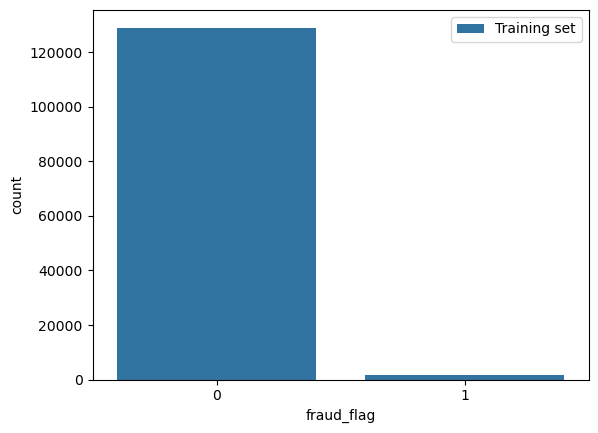

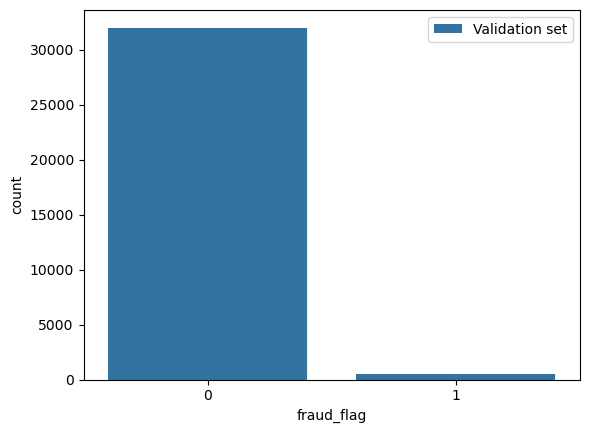

In [26]:
# Let's check their distribution 

sns.countplot(x=y_train, label='Training set')
plt.show()

sns.countplot(x=y_val, label='Validation set')
plt.show()

Looks great, let's see now if we didn't split items from the same IDs 

In [ ]:
X_train_not_encoded.head()

,ID,Nb_of_items,total_basket_price,item_number,item,Nbr_of_prod_purchas,make,model,goods_code,cash_price
0,85517,1.0,889.0,1,COMPUTERS,1.0,APPLE,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,239246776,889.0
1,51113,1.0,409.0,1,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,239001518,409.0
3,78712,2.0,808.0,1,COMPUTERS,1.0,APPLE,2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,239001422,689.0
4,78712,2.0,808.0,2,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE,237841896,119.0
5,77846,1.0,1199.0,1,TELEVISIONS HOME CINEMA,1.0,SONY,SONY BRAVIA KE48A9 2020 OLED HDR 4K ULTRA HD S...,239952954,1199.0


In [ ]:
X_val_not_encoded.head()

,ID,Nb_of_items,total_basket_price,item_number,item,Nbr_of_prod_purchas,make,model,goods_code,cash_price
2,83008,1.0,1399.0,1,TELEVISIONS HOME CINEMA,1.0,SAMSUNG,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,239842093,1399.0
6,86994,1.0,369.0,1,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE WATCH NIKE SERIES 7 GPS 41MM STARLIGHT A...,240382074,369.0
17,108706,3.0,843.0,1,COMPUTERS,1.0,APPLE,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI ...,240040984,717.0
18,108706,3.0,843.0,2,COMPUTER PERIPHERALS ACCESSORIES,1.0,APPLE,APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE,237841896,119.0
19,108706,3.0,843.0,3,FULFILMENT CHARGE,1.0,RETAILER,RETAILER,FULFILMENT,7.0


Everything seems to be going good.

## <a id='toc3_3_'></a>[Encoding](#toc0_)

- We have in our features **non-numerical** attributes that we have to deal with. Using a technique like a **one-hot encoder** will be overkill. Since the possible values of these columns is too vast, we will end up with **too much features**, and suffer from a **highly sparse dataset** that models will have a hard time to deal with, and may end-up **overfitting our model**.

- Using **Label encoding** can be problematic too, especially with the features we have. Again, since there is multiple possible values per feature, we will have a lot of values, and we can end-up with high values and **introduce a huge sense of ordinality**. Especially with models using distances, a feature that has a make of 1 and another 139 can be perceived as "far", even though there is no notion of that when you look at their values

- Let's encode the categorical variables using a **Target encoder**. 

    **Reminder :**   
    Target encoding, also known as mean encoding or likelihood encoding, is a technique used to encode categorical variables by replacing each category with the mean of the target variable for that category.  
  
      
- **How are we going to deal with the remaining NaNs ?**

    - Intuitively, a missing information about a manufacturer or a model of an item can potentially convey information about the nature of our investigated purchase. 

    - Having this in mind, for the remaining values (which mean unknown maker / model), we will assign a "Missing" category to them before encoding the values. This way, `the "absence of a value" for these features will be treated as a category of its own, and it will have the distribution for the target variable `

    - We tested other possible strategy, like replacing these values with a neutral prediction of **0.5**, or the majority class **0** so that these missing values have a neutral influence, and we got worse results than our chosen strategy, **which confirms our intuition.**

In [ ]:

# Identify the non-numerical columns for target encoding
non_numerical_columns = ['item', 'make', 'model', 'goods_code']


X_train_not_encoded[non_numerical_columns] = X_train_not_encoded[non_numerical_columns].fillna("Missing").astype(str)
X_val_not_encoded[non_numerical_columns] = X_val_not_encoded[non_numerical_columns].fillna("Missing").astype(str)

#To check if the missing values are replaced, we will check the ID 6467 that has a missing value in the model column

print("Value of the model column for ID 6467 in the training set, which should be 'Missing':")
print(X_train_not_encoded[X_train_not_encoded['ID'] == 6467]['model'])

# Initialize the TargetEncoder with handle_missing='return_nan' to keep NaN values
encoder = ce.TargetEncoder(cols=non_numerical_columns, handle_missing='return_nan', handle_unknown='value')

# Fit the encoder on the training data and transform both training and validation sets
X_train_encoded = encoder.fit_transform(X_train_not_encoded, y_train)
X_val_encoded = encoder.transform(X_val_not_encoded)

#convert ID to int

X_train_encoded['ID'] = X_train_encoded['ID'].astype(int)
X_val_encoded['ID'] = X_val_encoded['ID'].astype(int)

# Replace NaN values with -1 in the encoded datasets
#X_train_encoded.fillna(0.5, inplace=True)
#X_val_encoded.fillna(0.5, inplace=True)

# Display the first few rows of the encoded training data
print("Encoded Training Data:")
print(X_train_encoded.head())

# Display the first few rows of the encoded validation data
print("Encoded Validation Data:")
print(X_val_encoded.head())

Value of the model column for ID 6467 in the training set, which should be 'Missing':
44    Missing
45    Missing
46    Missing
Name: model, dtype: object
Encoded Training Data:
      ID  Nb_of_items  total_basket_price item_number      item  \
0  85517          1.0               889.0           1  0.022794   
1  51113          1.0               409.0           1  0.004236   
3  78712          2.0               808.0           1  0.022794   
4  78712          2.0               808.0           2  0.004236   
5  77846          1.0              1199.0           1  0.004178   

  Nbr_of_prod_purchas      make     model  goods_code cash_price  
0                 1.0  0.018200  0.012292    0.014744      889.0  
1                 1.0  0.018200  0.005435    0.002874      409.0  
3                 1.0  0.018200  0.002796    0.000003      689.0  
4                 1.0  0.018200  0.003053    0.002721      119.0  
5                 1.0  0.002794  0.005102    0.005128     1199.0  
Encoded Validatio

In [ ]:
#Check if there is some missing values in the encoded data on the validation set

X_val_encoded.isna().sum()

ID                     0
Nb_of_items            0
total_basket_price     0
item_number            0
item                   0
Nbr_of_prod_purchas    0
make                   0
model                  0
goods_code             0
cash_price             0
dtype: int64

We also have to make sure now that the dtypes are numeric

In [ ]:
X_train_encoded.dtypes

ID                       int32
Nb_of_items            float64
total_basket_price     float64
item_number             object
item                   float64
Nbr_of_prod_purchas     object
make                   float64
model                  float64
goods_code             float64
cash_price              object
dtype: object

In [ ]:
#let's convert all the columns to float type (except the ID column) (bad behavior of the pandas groupby function)

#item number, nbr_of_prod_purchas, cash_price

X_train_encoded['item_number'] = X_train_encoded['item_number'].astype(float)
X_train_encoded['Nbr_of_prod_purchas'] = X_train_encoded['Nbr_of_prod_purchas'].astype(float)
X_train_encoded['cash_price'] = X_train_encoded['cash_price'].astype(float)

X_val_encoded['item_number'] = X_val_encoded['item_number'].astype(float)
X_val_encoded['Nbr_of_prod_purchas'] = X_val_encoded['Nbr_of_prod_purchas'].astype(float)
X_val_encoded['cash_price'] = X_val_encoded['cash_price'].astype(float)

X_train_encoded.dtypes


ID                       int32
Nb_of_items            float64
total_basket_price     float64
item_number            float64
item                   float64
Nbr_of_prod_purchas    float64
make                   float64
model                  float64
goods_code             float64
cash_price             float64
dtype: object

---------

# <a id='toc4_'></a>[Predictions and experimentations](#toc0_)

- **The benchmark** that we are trying to beat is an `average_precision_score of 0.14`

- BE CAREFUL !! Here, we will have predictions **PER ITEM**, and not **PER ID**.
What we will do is, if one of the items of the same ID (meaning the same basket), is predicted as fraudulent, the **whole basket should be fraudulent**. We then should always come  back to this format before **evaluating the performance and the score of our model** 

- Remark : Before training our models, we will **remove the ID column**. We already have other meaningful features that are repeated to keep the link between items of the same basket. the `ID column doesn't provide any information about the nature of the transactions. Keeping them can lead for our model to OVERFIT on it`.

## <a id='toc4_1_'></a>[Logistic Classifier](#toc0_)

- Let's start with a simple Logistic Classifier

In [22]:
#Let's set a df to store the average precision score of the models

average_precision_scores = pd.DataFrame(columns=['Model', 'Average Precision Score'])

#let's store the benchmark, which is an average precision score of 0.14

average_precision_scores.loc[0] = ['Benchmark', 0.14]

average_precision_scores

,Model,Average Precision Score
0,Benchmark,0.14


In [23]:


# Assuming X_train_encoded, y_train, X_val_encoded, and y_val are already defined

# Separate the "ID" column
X_train_ids = X_train_encoded["ID"]
X_val_ids = X_val_encoded["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_encoded.drop(columns=["ID"])
X_val_no_id = X_val_encoded.drop(columns=["ID"])

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the training data without the "ID" column
logistic_model.fit(X_train_no_id, y_train)

# Make predictions on the validation set without the "ID" column
y_val_pred_prob = logistic_model.predict_proba(X_val_no_id)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = logistic_model.predict(X_val_no_id)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f"Average Precision Score on validation set: {average_precision:.4f}")

# Store the average precision score in the DataFrame
average_precision_scores.loc[1] = ['Logistic Regression', average_precision]


average_precision_scores


Average Precision Score on validation set: 0.0280


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027


- As expected, the classifier performs poorly, especially due to the nature of our dataset.  
- Let's try to balance the dataset with over-sampling to see if we can improve our model.

In [27]:

# Assuming X_train_encoded, y_train, X_val_encoded, and y_val are already defined

# Separate the "ID" column
X_train_ids = X_train_encoded["ID"]
X_val_ids = X_val_encoded["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_encoded.drop(columns=["ID"])
X_val_no_id = X_val_encoded.drop(columns=["ID"])

# Resample the training data using ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_no_id, y_train)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set without the "ID" column
y_val_pred_prob = logistic_model.predict_proba(X_val_no_id)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = logistic_model.predict(X_val_no_id)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f"Average Precision Score on validation set: {average_precision:.4f}")

# Store the average precision score in the DataFrame
average_precision_scores.loc[2] = ['Logistic Regression with ADASYN', average_precision]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Average Precision Score on validation set: 0.0502


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163


- We are going to scale the data to make the task easier on the model. Since in our problem **absolute magnitudes matters** (Cash price etc), we will use a MinMax Scaler to normalize rather than standardize.

In [28]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming X_train_encoded, y_train, X_val_encoded, and y_val are already defined

# Separate the "ID" column
X_train_ids = X_train_encoded["ID"]
X_val_ids = X_val_encoded["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_encoded.drop(columns=["ID"])
X_val_no_id = X_val_encoded.drop(columns=["ID"])

# Scale the training and validation data using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_no_id)
X_val_scaled = scaler.transform(X_val_no_id)

# Resample the scaled training data using ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled validation set without the "ID" column
y_val_pred_prob = logistic_model.predict_proba(X_val_scaled)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = logistic_model.predict(X_val_scaled)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f"Average Precision Score on validation set: {average_precision:.4f}")

# Store the average precision score in the DataFrame

average_precision_scores.loc[3] = ['Logistic Regression with ADASYN and Min-Max Scaling', average_precision]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Average Precision Score on validation set: 0.0791


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117


## <a id='toc4_2_'></a>[QDA CLassifier](#toc0_)

In [29]:
from imblearn.over_sampling import ADASYN
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
import pandas as pd

# Separate the "ID" column
X_train_ids = X_train_encoded["ID"]
X_val_ids = X_val_encoded["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_encoded.drop(columns=["ID"])
X_val_no_id = X_val_encoded.drop(columns=["ID"])

# Scale the training and validation data using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_no_id)
X_val_scaled = scaler.transform(X_val_no_id)

# Resample the scaled training data using ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the resampled training data
qda_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled validation set
y_val_pred_prob = qda_model.predict_proba(X_val_scaled)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = qda_model.predict(X_val_scaled)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f'Average precision score: {average_precision:.5f}')

# Store the average precision score in the DataFrame

average_precision_scores.loc[4] = ['QDA with ADASYN and Min-Max Scaling', average_precision]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Average precision score: 0.06494


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117
4,QDA with ADASYN and Min-Max Scaling,0.064937


- Now, let's add some new features to add more nuances to our dataset.

In [30]:
def compute_contribution_to_total(df):
    df["contribution_to_total"] = df["cash_price"] / df["total_basket_price"]
    df["contribution_to_total"].fillna(0, inplace=True)  # Handle division by zero
    return df

# Average item price in the basket
def compute_avg_item_price(df):
    df["avg_item_price"] = df["total_basket_price"] / df["Nb_of_items"]
    df["avg_item_price"].fillna(0, inplace=True)
    return df

# Maximum item contribution to total basket price
def compute_max_item_contribution(df):
    df["max_item_contribution"] = df[["cash_price", "total_basket_price"]].max(axis=1) / df["total_basket_price"]
    df["max_item_contribution"].fillna(0, inplace=True)
    return df

# Basket price deviation (Z-score)
def compute_basket_price_zscore(df):
    mean_price = df["total_basket_price"].mean()
    std_price = df["total_basket_price"].std()
    df["basket_price_zscore"] = (df["total_basket_price"] - mean_price) / (std_price + 1e-6)
    return df

# Item repetition within a basket
def compute_item_repetition_ratio(df):
    df["item_repetition_ratio"] = df["Nbr_of_prod_purchas"] / df["Nb_of_items"]
    df["item_repetition_ratio"].fillna(0, inplace=True)
    return df

# Apply transformations
X_train_augmented = compute_contribution_to_total(X_train_encoded)
X_train_augmented = compute_avg_item_price(X_train_augmented)
X_train_augmented = compute_max_item_contribution(X_train_augmented)
X_train_augmented = compute_basket_price_zscore(X_train_augmented)
X_train_augmented = compute_item_repetition_ratio(X_train_augmented)

X_val_augmented = compute_contribution_to_total(X_val_encoded)
X_val_augmented = compute_avg_item_price(X_val_augmented)
X_val_augmented = compute_max_item_contribution(X_val_augmented)
X_val_augmented = compute_basket_price_zscore(X_val_augmented)
X_val_augmented = compute_item_repetition_ratio(X_val_augmented)

# Display the first few rows of the augmented training data
print("Augmented Training Data:")
X_train_augmented.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_8892\2912828550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["contribution_to_total"].fillna(0, inplace=True)  # Handle division by zero
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\2912828550.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Augmented Training Data:


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\2912828550.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["item_repetition_ratio"].fillna(0, inplace=True)


,ID,Nb_of_items,total_basket_price,item_number,item,Nbr_of_prod_purchas,make,model,goods_code,cash_price,contribution_to_total,avg_item_price,max_item_contribution,basket_price_zscore,item_repetition_ratio
0,85517,1.0,889.0,1.0,0.022794,1.0,0.018200,0.012292,0.014744,889.0,1.000000,889.0,1.0,-0.534347,1.0
1,51113,1.0,409.0,1.0,0.004236,1.0,0.018200,0.005435,0.002874,409.0,1.000000,409.0,1.0,-1.084122,1.0
3,78712,2.0,808.0,1.0,0.022794,1.0,0.018200,0.002796,0.000003,689.0,0.852723,404.0,1.0,-0.627122,0.5
4,78712,2.0,808.0,2.0,0.004236,1.0,0.018200,0.003053,0.002721,119.0,0.147277,404.0,1.0,-0.627122,0.5
5,77846,1.0,1199.0,1.0,0.004178,1.0,0.002794,0.005102,0.005128,1199.0,1.000000,1199.0,1.0,-0.179284,1.0


In [31]:


# Separate the "ID" column
X_train_ids = X_train_augmented["ID"]
X_val_ids = X_val_augmented["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_augmented.drop(columns=["ID"])
X_val_no_id = X_val_augmented.drop(columns=["ID"])

# Scale the training and validation data using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_no_id)
X_val_scaled = scaler.transform(X_val_no_id)

# Resample the scaled training data using ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled validation set without the "ID" column
y_val_pred_prob = logistic_model.predict_proba(X_val_scaled)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = logistic_model.predict(X_val_scaled)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f"Average Precision Score on validation set: {average_precision:.4f}")

# Store the average precision score in the DataFrame

average_precision_scores.loc[5] = ['Logistic Regression with ADASYN, Min-Max Scaling, and Augmented Features', average_precision]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Average Precision Score on validation set: 0.0793


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117
4,QDA with ADASYN and Min-Max Scaling,0.064937
5,"Logistic Regression with ADASYN, Min-Max Scali...",0.079257


- Now we will try an SVC with an RBF kernel. Since SVC takes way more time to compute than the other models, we will use a subsample (while keeping the target distribution and items of the same IDs in the same basket).

## <a id='toc4_3_'></a>[SVC](#toc0_)

In [32]:
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
import pandas as pd
import numpy as np


# Separate the "ID" column
X_train_ids = X_train_augmented["ID"]
X_val_ids = X_val_augmented["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_augmented.drop(columns=["ID"])
X_val_no_id = X_val_augmented.drop(columns=["ID"])

# Create a meaningful subsample of the training data
# Ensure the subsample has the same target distribution and keeps items of the same IDs
subsample_size = 0.1  # Use 10% of the training data
unique_ids = X_train_ids.unique()
np.random.seed(42)
subsample_ids = np.random.choice(unique_ids, size=int(len(unique_ids) * subsample_size), replace=False)
X_train_subsample = X_train_no_id[X_train_ids.isin(subsample_ids)]
y_train_subsample = y_train[X_train_ids.isin(subsample_ids)]

# Scale the training and validation data using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_subsample)
X_val_scaled = scaler.transform(X_val_no_id)

# Resample the scaled training data using ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train_subsample)

# Initialize the SVC model with RBF kernel
svc_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the SVC model on the resampled training data
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled validation set
y_val_pred_prob = svc_model.predict_proba(X_val_scaled)[:, 1]  # Get probability of fraud (class 1)
y_val_pred = svc_model.predict(X_val_scaled)  # Get predicted class labels

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f'Average precision score: {average_precision:.5f}')

# Store the average precision score in the DataFrame

average_precision_scores.loc[6] = ['SVC with RBF Kernel, ADASYN, and Min-Max Scaling', average_precision]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Average precision score: 0.07032


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117
4,QDA with ADASYN and Min-Max Scaling,0.064937
5,"Logistic Regression with ADASYN, Min-Max Scali...",0.079257
6,"SVC with RBF Kernel, ADASYN, and Min-Max Scaling",0.070320


## <a id='toc4_4_'></a>[XGBoost and Random Forest Classifier](#toc0_)

- Since we are dealing with a highly umbalanced dataset, Boosting and Bagging gradient should be the models that performs the best. We are going to try XGBoost and Random Forest Classifier. (No need to scale the data for these models).

In [33]:



# Separate the "ID" column
X_train_ids = X_train_augmented["ID"]
X_val_ids = X_val_augmented["ID"]

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_augmented.drop(columns=["ID"])
X_val_no_id = X_val_augmented.drop(columns=["ID"])


# Calculate the scale_pos_weight
num_negatives = (y_train == 0).sum()
num_positives = (y_train == 1).sum()
scale_pos_weight = num_negatives / num_positives
scale_pos_weight_sqrt = np.sqrt(num_negatives / num_positives)  # Square root method
scale_pos_weight_log = np.log(num_negatives / num_positives)  # Log method

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    n_estimators=500,           # More trees
    #learning_rate=0.01,         # Lower learning rate
    #max_depth=10,                # Control tree depth
    #min_child_weight=,         # Minimum samples per leaf
    #gamma=1,                    # Pruning
    subsample=0.8,              # Use 80% of data per tree
    colsample_bytree=0.8,       # Use 80% of features per tree
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    #reg_lambda=1,              # L2 regularization
    #reg_alpha=1,                # L1 regularization
    random_state=42,
    eval_metric='aucpr',
    use_label_encoder=False
)

# Fit the model on the training data
model.fit(X_train_no_id, y_train)

# Make predictions on the validation set
y_val_pred_prob = model.predict_proba(X_val_no_id)[:, 1]  # Get probability of fraud (class 1)

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f'Average precision score: {average_precision:.5f}')

# Store the average precision score in the DataFrame

average_precision_scores.loc[7] = ['XGBoost with Augmented Features', average_precision]

c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average precision score: 0.17310


- For the first time, we managed to surpass the benchmark ! We are headed in the right direction. Let's see what the Random Forest Classifier has to offer

In [34]:

# Remove the "ID" column from the training and validation data
X_train_no_id = X_train_augmented.drop(columns=["ID"])
X_val_no_id = X_val_augmented.drop(columns=["ID"])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,           # More trees
    max_depth=10,               # Control tree depth
    min_samples_split=2,        # Minimum samples per split
    min_samples_leaf=1,         # Minimum samples per leaf
    max_features='sqrt',        # Number of features to consider at each split
    #bootstrap=True,             # Use bootstrap samples
    random_state=42
)

# Fit the model on the training data
rf_model.fit(X_train_no_id, y_train)

# Make predictions on the validation set
y_val_pred_prob = rf_model.predict_proba(X_val_no_id)[:, 1]  # Get probability of fraud (class 1)

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob})

# Transform ID to int
df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred = df_val_predictions.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud = df_actual_fraud.groupby("ID", sort=False).max().reset_index()
df_actual_fraud.dropna(inplace=True)

# Calculate the average precision score
average_precision = average_precision_score(df_actual_fraud['fraud_flag'], df_basket_pred['fraud_prob'])

print(f'Average precision score: {average_precision:.5f}')

# Store the average precision score in the DataFrame
average_precision_scores.loc[8] = ['Random Forest with Augmented Features', average_precision]

average_precision_scores

Average precision score: 0.13377


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117
4,QDA with ADASYN and Min-Max Scaling,0.064937
5,"Logistic Regression with ADASYN, Min-Max Scali...",0.079257
6,"SVC with RBF Kernel, ADASYN, and Min-Max Scaling",0.070320
7,XGBoost with Augmented Features,0.173104
8,Random Forest with Augmented Features,0.133771


Text(0.5, 1.0, 'XGBoost Feature Importances')

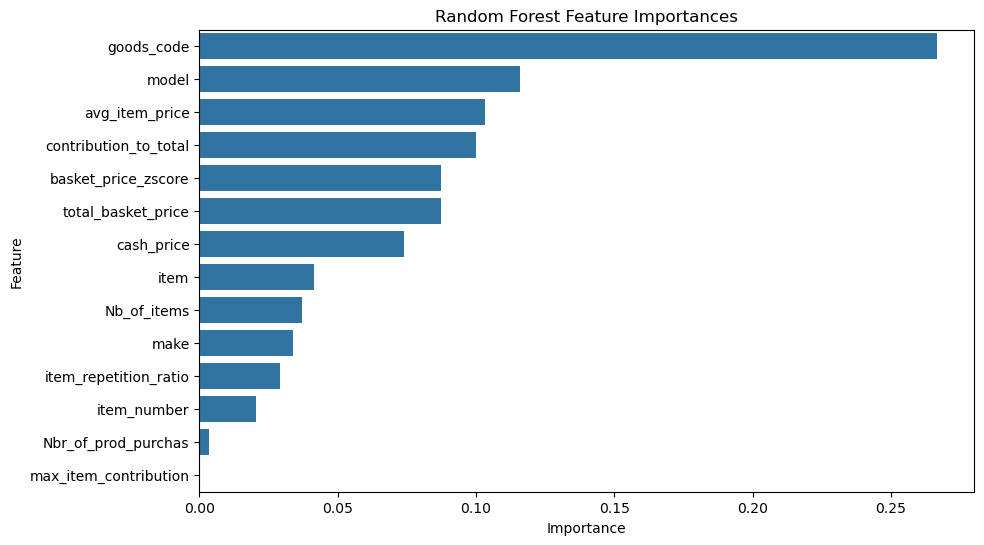

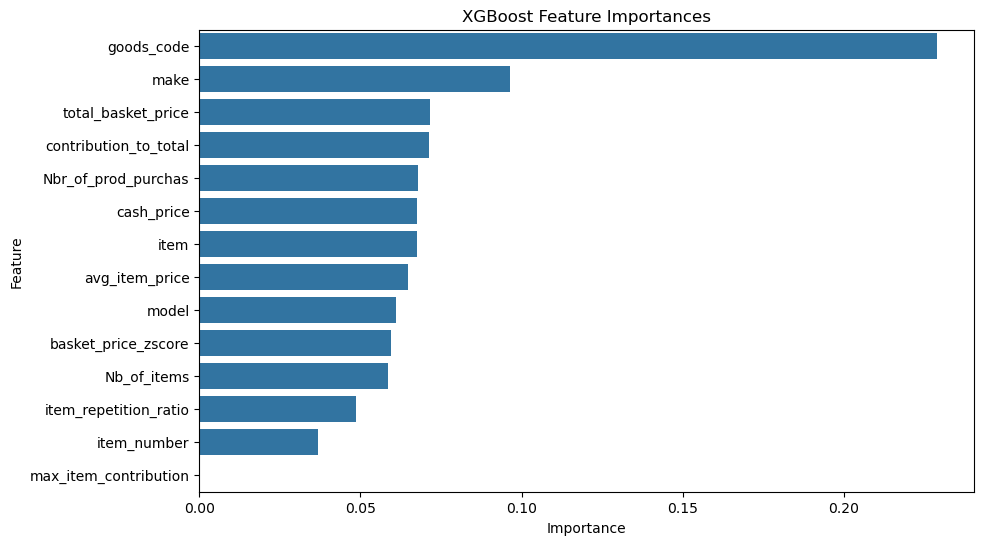

In [35]:
#Let's check the feature importance of the Random Forest model and the XGBoost model

# Get the feature importances from the Random Forest model

feature_importances_rf = rf_model.feature_importances_

#features without ID
features = X_train_augmented.columns[1:]

# Create a DataFrame to store the feature importances

df_feature_importances_rf = pd.DataFrame({"Feature": features, "Importance": feature_importances_rf})

# Sort the DataFrame by importance in descending order

df_feature_importances_rf = df_feature_importances_rf.sort_values(by="Importance", ascending=False)

#plot the feature importances

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=df_feature_importances_rf)
plt.title("Random Forest Feature Importances")

# Get the feature importances from the XGBoost model

feature_importances_xgb = model.feature_importances_

# Create a DataFrame to store the feature importances

df_feature_importances_xgb = pd.DataFrame({"Feature": features, "Importance": feature_importances_xgb})

# Sort the DataFrame by importance in descending order

df_feature_importances_xgb = df_feature_importances_xgb.sort_values(by="Importance", ascending=False)

#plot the feature importances

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=df_feature_importances_xgb)
plt.title("XGBoost Feature Importances")



- Wee that by far **goods_code** is the most relevant features for the two models. The intuition is that some products appears a lot in fraudulent cases.

- Let's now optimize our best performing model : **the XGBoost !**

    -  First, we are going to select only the most relevant features to remove unnecessary information.

In [36]:
feature_importance = model.get_booster().get_score(importance_type='weight')
feature_importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum() / feature_importance_df['Importance'].sum()

# Select features that capture 80% of the importance
important_features = feature_importance_df[feature_importance_df['Cumulative Importance'] <= 0.9]['Feature'].tolist()

print("Important Features (90% of importance):")
print(important_features)

Important Features (90% of importance):
['total_basket_price', 'avg_item_price', 'contribution_to_total', 'goods_code', 'model', 'cash_price']


In [37]:
# Filter the training and validation data to include only the important features
X_train_important = X_train_no_id[important_features]
X_val_important = X_val_no_id[important_features]

# Initialize the new XGBoost model
model_important = xgb.XGBClassifier(
    n_estimators=500,           # More trees
    #learning_rate=0.01,         # Lower learning rate
    #max_depth=10,                # Control tree depth
    #min_child_weight=,         # Minimum samples per leaf
    #gamma=1,                    # Pruning
    subsample=0.8,              # Use 80% of data per tree
    colsample_bytree=0.8,       # Use 80% of features per tree
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    #reg_lambda=1,              # L2 regularization
    #reg_alpha=1,                # L1 regularization
    random_state=42,
    eval_metric='aucpr',
    use_label_encoder=False
)

# Fit the model on the training data with important features
model_important.fit(X_train_important, y_train)

# Make predictions on the validation set with important features
y_val_pred_prob_important = model_important.predict_proba(X_val_important)[:, 1]  # Get probability of fraud (class 1)

# Attach predictions to their corresponding basket ID
df_val_predictions_important = pd.DataFrame({"ID": X_val_ids, "fraud_prob": y_val_pred_prob_important})

# Transform ID to int
df_val_predictions_important['ID'] = df_val_predictions_important['ID'].astype(int)

# Aggregate predictions per basket (using max probability)
df_basket_pred_important = df_val_predictions_important.groupby("ID", sort=False).max().reset_index()

# Get the actual fraud labels per ID (assuming fraud_flag is unique per basket)
df_actual_fraud_important = pd.DataFrame({"ID": X_val_ids, "fraud_flag": y_val})
df_actual_fraud_important = df_actual_fraud_important.groupby("ID", sort=False).max().reset_index()
df_actual_fraud_important.dropna(inplace=True)

# Calculate the average precision score
average_precision_important = average_precision_score(df_actual_fraud_important['fraud_flag'], df_basket_pred_important['fraud_prob'])

print(f'Average precision score with important features: {average_precision_important:.5f}')

# Store the average precision score in the DataFrame
average_precision_scores.loc[9] = ['XGBoost with Important Features (90%)', average_precision_important]

average_precision_scores

c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:05:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average precision score with important features: 0.19013


,Model,Average Precision Score
0,Benchmark,0.140000
1,Logistic Regression,0.028027
2,Logistic Regression with ADASYN,0.050163
3,Logistic Regression with ADASYN and Min-Max Sc...,0.079117
4,QDA with ADASYN and Min-Max Scaling,0.064937
5,"Logistic Regression with ADASYN, Min-Max Scali...",0.079257
6,"SVC with RBF Kernel, ADASYN, and Min-Max Scaling",0.070320
7,XGBoost with Augmented Features,0.173104
8,Random Forest with Augmented Features,0.133771
9,XGBoost with Important Features (90%),0.190129


- We can see a significant improvement ! Now let's optimize our model further using **Optuna !**   
(Optuna is a hyperparameter optimization framework that automates the process of searching for the best hyperparameters.)

In [40]:
import optuna
import xgboost as xgb
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': 0.8,
        'scale_pos_weight': scale_pos_weight,  # Use the previously calculated scale_pos_weight
        'random_state': 42,
        'eval_metric': 'aucpr',
        'use_label_encoder': False
    }

    # Initialize the XGBoost model with the hyperparameters
    model = xgb.XGBClassifier(**param)

    # Split the unique IDs into training and validation sets
    unique_ids = X_train_augmented['ID'].unique()

    X_merged = X_train_augmented.copy()
    X_merged['fraud_flag'] = y_train

    train_ids, val_ids = train_test_split(unique_ids, test_size=0.2, random_state=42, stratify=X_merged[['ID', 'fraud_flag']].drop_duplicates()['fraud_flag'])

    # Create training and validation sets based on the split IDs
    X_train_split = X_train_augmented[X_train_augmented['ID'].isin(train_ids)].drop(columns=['ID'])
    y_train_split = y_train[X_train_augmented['ID'].isin(train_ids)]
    X_val_split = X_train_augmented[X_train_augmented['ID'].isin(val_ids)].drop(columns=['ID'])
    y_val_split = y_train[X_train_augmented['ID'].isin(val_ids)]

    # Filter the training and validation data to include only the important  features (ID is removed)
    X_train_split = X_train_split[important_features]
    X_val_split = X_val_split[important_features]

    # Fit the model on the training data
    model.fit(X_train_split, y_train_split)

    # Make predictions on the validation set
    y_val_pred_prob = model.predict_proba(X_val_split)[:, 1]  # Get probability of fraud (class 1)

    # Calculate the average precision score
    average_precision = average_precision_score(y_val_split, y_val_pred_prob)

    return average_precision

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50,show_progress_bar=True)

# Print the best hyperparameters
print("Best hyperparameters:")
print(study.best_params)



[I 2025-02-10 18:06:05,170] A new study created in memory with name: no-name-307ed860-9bed-472b-8ac6-3da3addea2bb


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:06:17,982] Trial 0 finished with value: 0.14293431898633208 and parameters: {'n_estimators': 346, 'learning_rate': 0.2399411417883397, 'max_depth': 14, 'subsample': 0.782318562104563}. Best is trial 0 with value: 0.14293431898633208.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:06:22,315] Trial 1 finished with value: 0.17112223942113447 and parameters: {'n_estimators': 185, 'learning_rate': 0.07442164227758398, 'max_depth': 8, 'subsample': 0.9567664337690474}. Best is trial 1 with value: 0.17112223942113447.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:06:32,444] Trial 2 finished with value: 0.17122052714525202 and parameters: {'n_estimators': 551, 'learning_rate': 0.042360986587374284, 'max_depth': 4, 'subsample': 0.5726832628149338}. Best is trial 2 with value: 0.17122052714525202.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:06:44,974] Trial 3 finished with value: 0.1649065765116696 and parameters: {'n_estimators': 418, 'learning_rate': 0.11697262117372154, 'max_depth': 7, 'subsample': 0.9694238686252212}. Best is trial 2 with value: 0.17122052714525202.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:06:56,034] Trial 4 finished with value: 0.17369653494502346 and parameters: {'n_estimators': 722, 'learning_rate': 0.01965640830458714, 'max_depth': 4, 'subsample': 0.7604145030840272}. Best is trial 4 with value: 0.17369653494502346.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:07:02,212] Trial 5 finished with value: 0.17877955372877874 and parameters: {'n_estimators': 322, 'learning_rate': 0.03229193066694856, 'max_depth': 5, 'subsample': 0.6723153441447991}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:07:05,809] Trial 6 finished with value: 0.1684862023954861 and parameters: {'n_estimators': 224, 'learning_rate': 0.25018862103669615, 'max_depth': 3, 'subsample': 0.8855321859252523}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:07:10,657] Trial 7 finished with value: 0.16677290820772134 and parameters: {'n_estimators': 144, 'learning_rate': 0.10075965699307761, 'max_depth': 9, 'subsample': 0.7394488968686916}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:07:25,970] Trial 8 finished with value: 0.15146639157797048 and parameters: {'n_estimators': 442, 'learning_rate': 0.06670378451083833, 'max_depth': 11, 'subsample': 0.7913767558096696}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:07:52,743] Trial 9 finished with value: 0.14137159175443323 and parameters: {'n_estimators': 559, 'learning_rate': 0.11452743658546327, 'max_depth': 14, 'subsample': 0.721714655654579}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:08:05,941] Trial 10 finished with value: 0.17031990002807032 and parameters: {'n_estimators': 278, 'learning_rate': 0.010907497429966401, 'max_depth': 6, 'subsample': 0.5105322184034644}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:08:28,059] Trial 11 finished with value: 0.1727118598827876 and parameters: {'n_estimators': 798, 'learning_rate': 0.02301728955752818, 'max_depth': 5, 'subsample': 0.6458770520869281}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:08:41,322] Trial 12 finished with value: 0.1630432992413269 and parameters: {'n_estimators': 790, 'learning_rate': 0.023875454522397404, 'max_depth': 3, 'subsample': 0.6588981880408492}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:09:05,056] Trial 13 finished with value: 0.16485240343053076 and parameters: {'n_estimators': 647, 'learning_rate': 0.021388076741715247, 'max_depth': 11, 'subsample': 0.8559250159211138}. Best is trial 5 with value: 0.17877955372877874.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:09:20,795] Trial 14 finished with value: 0.1895174910298623 and parameters: {'n_estimators': 661, 'learning_rate': 0.013032877095342548, 'max_depth': 6, 'subsample': 0.6576370723981031}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:09:34,139] Trial 15 finished with value: 0.17917724041892988 and parameters: {'n_estimators': 523, 'learning_rate': 0.011337123131753935, 'max_depth': 6, 'subsample': 0.641865885482629}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:09:47,890] Trial 16 finished with value: 0.18028144744689267 and parameters: {'n_estimators': 552, 'learning_rate': 0.01046358022122006, 'max_depth': 7, 'subsample': 0.5869219519150882}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:10:13,630] Trial 17 finished with value: 0.17469656691264612 and parameters: {'n_estimators': 648, 'learning_rate': 0.014855592019868536, 'max_depth': 11, 'subsample': 0.5346333008618588}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:10:28,135] Trial 18 finished with value: 0.17475187500280584 and parameters: {'n_estimators': 625, 'learning_rate': 0.010007982353634447, 'max_depth': 9, 'subsample': 0.5996768887171758}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:10:43,420] Trial 19 finished with value: 0.17517322458375897 and parameters: {'n_estimators': 706, 'learning_rate': 0.035180788199342235, 'max_depth': 8, 'subsample': 0.576899929408853}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:10:57,666] Trial 20 finished with value: 0.17003846213522972 and parameters: {'n_estimators': 491, 'learning_rate': 0.01608658940698867, 'max_depth': 10, 'subsample': 0.7041126469430227}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:11:07,277] Trial 21 finished with value: 0.18534060663450327 and parameters: {'n_estimators': 537, 'learning_rate': 0.013948829454650882, 'max_depth': 6, 'subsample': 0.6085487082700857}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:11:18,823] Trial 22 finished with value: 0.18450912452705995 and parameters: {'n_estimators': 605, 'learning_rate': 0.014936954495277176, 'max_depth': 7, 'subsample': 0.6072182997733759}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:11:29,279] Trial 23 finished with value: 0.184527273701013 and parameters: {'n_estimators': 607, 'learning_rate': 0.016520487373288633, 'max_depth': 6, 'subsample': 0.6190007085931251}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:11:42,275] Trial 24 finished with value: 0.17846378891053324 and parameters: {'n_estimators': 707, 'learning_rate': 0.028054009298399497, 'max_depth': 5, 'subsample': 0.6850527382744409}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:11:53,598] Trial 25 finished with value: 0.1765587089513191 and parameters: {'n_estimators': 400, 'learning_rate': 0.016150701586118203, 'max_depth': 6, 'subsample': 0.5441053135974269}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:12:03,655] Trial 26 finished with value: 0.1675067173541836 and parameters: {'n_estimators': 468, 'learning_rate': 0.050044317900373794, 'max_depth': 4, 'subsample': 0.6112905051079323}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:12:22,360] Trial 27 finished with value: 0.18298606412631907 and parameters: {'n_estimators': 722, 'learning_rate': 0.013247928730384844, 'max_depth': 8, 'subsample': 0.6308653971753067}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:12:33,960] Trial 28 finished with value: 0.18447493929634598 and parameters: {'n_estimators': 591, 'learning_rate': 0.018984876560608994, 'max_depth': 6, 'subsample': 0.5422059794358302}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:12:47,729] Trial 29 finished with value: 0.1465713265425738 and parameters: {'n_estimators': 373, 'learning_rate': 0.19920021130963916, 'max_depth': 14, 'subsample': 0.7807590310588733}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:13:10,955] Trial 30 finished with value: 0.1674370785394718 and parameters: {'n_estimators': 672, 'learning_rate': 0.01319295121200392, 'max_depth': 13, 'subsample': 0.6881887890391137}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:13:26,982] Trial 31 finished with value: 0.18381205146477553 and parameters: {'n_estimators': 592, 'learning_rate': 0.01617212991414632, 'max_depth': 7, 'subsample': 0.5999260424323989}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:13:39,646] Trial 32 finished with value: 0.18312300161195677 and parameters: {'n_estimators': 597, 'learning_rate': 0.027810272021929736, 'max_depth': 7, 'subsample': 0.6256808220598103}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:13:49,900] Trial 33 finished with value: 0.1778658442236397 and parameters: {'n_estimators': 505, 'learning_rate': 0.013456196544809576, 'max_depth': 8, 'subsample': 0.5481317199673079}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:13:57,589] Trial 34 finished with value: 0.1740970126663309 and parameters: {'n_estimators': 539, 'learning_rate': 0.01823046413077371, 'max_depth': 5, 'subsample': 0.6630058435836964}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:14:10,197] Trial 35 finished with value: 0.16633387177030337 and parameters: {'n_estimators': 757, 'learning_rate': 0.012620107491088363, 'max_depth': 4, 'subsample': 0.5719711356929101}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:14:23,796] Trial 36 finished with value: 0.1806588843299463 and parameters: {'n_estimators': 680, 'learning_rate': 0.04180766441312022, 'max_depth': 7, 'subsample': 0.5054361329532677}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:14:36,301] Trial 37 finished with value: 0.1847481984979144 and parameters: {'n_estimators': 616, 'learning_rate': 0.027040871751184276, 'max_depth': 6, 'subsample': 0.6168354204768698}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:14:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:14:48,084] Trial 38 finished with value: 0.17375381700676082 and parameters: {'n_estimators': 571, 'learning_rate': 0.02707148111443941, 'max_depth': 4, 'subsample': 0.7188259092361193}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:15:12,465] Trial 39 finished with value: 0.17338689031752255 and parameters: {'n_estimators': 640, 'learning_rate': 0.03375080576636993, 'max_depth': 9, 'subsample': 0.8210578087791573}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:15:22,009] Trial 40 finished with value: 0.1773951259150475 and parameters: {'n_estimators': 455, 'learning_rate': 0.018583918141092347, 'max_depth': 5, 'subsample': 0.7407972972716815}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:15:35,578] Trial 41 finished with value: 0.18026988722765988 and parameters: {'n_estimators': 618, 'learning_rate': 0.02157237225359368, 'max_depth': 6, 'subsample': 0.6246152859126789}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:15:48,560] Trial 42 finished with value: 0.18302500909516622 and parameters: {'n_estimators': 679, 'learning_rate': 0.015141316124919701, 'max_depth': 7, 'subsample': 0.5671703714355921}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:04,876] Trial 43 finished with value: 0.18447593957991967 and parameters: {'n_estimators': 740, 'learning_rate': 0.012105379220762928, 'max_depth': 6, 'subsample': 0.6074091935119321}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:14,874] Trial 44 finished with value: 0.16365477243554744 and parameters: {'n_estimators': 503, 'learning_rate': 0.0606962053467998, 'max_depth': 8, 'subsample': 0.6648936503899593}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:22,029] Trial 45 finished with value: 0.18084101035445377 and parameters: {'n_estimators': 608, 'learning_rate': 0.02551637690146311, 'max_depth': 5, 'subsample': 0.9343908211382285}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:29,323] Trial 46 finished with value: 0.16605691611107515 and parameters: {'n_estimators': 573, 'learning_rate': 0.019748114478913566, 'max_depth': 4, 'subsample': 0.6400936234764685}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:36,638] Trial 47 finished with value: 0.16449860472278627 and parameters: {'n_estimators': 528, 'learning_rate': 0.08503322676750234, 'max_depth': 3, 'subsample': 0.6955207667623496}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:47,762] Trial 48 finished with value: 0.1856454605666175 and parameters: {'n_estimators': 665, 'learning_rate': 0.03874456557230618, 'max_depth': 6, 'subsample': 0.6599787269460289}. Best is trial 14 with value: 0.1895174910298623.


C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\asus\AppData\Local\Temp\ipykernel_8892\1532981678.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[I 2025-02-10 18:16:52,053] Trial 49 finished with value: 0.18099200898969797 and parameters: {'n_estimators': 117, 'learning_rate': 0.040234036124475424, 'max_depth': 6, 'subsample': 0.7212624276888058}. Best is trial 14 with value: 0.1895174910298623.
Best hyperparameters:
{'n_estimators': 661, 'learning_rate': 0.013032877095342548, 'max_depth': 6, 'subsample': 0.6576370723981031}


-  If you don't want to recompute optuna

In [46]:
# Show the best hyperparameters

best_params = study.best_params

#to avoid running the optimization again, we can use the best hyperparameters found by the optimization

#best_params ={'n_estimators': 661, 'learning_rate': 0.013032877095342548, 'max_depth': 6, 'subsample': 0.6576370723981031}

print("Best hyperparameters:")
print(best_params)


Best hyperparameters:
{'n_estimators': 661, 'learning_rate': 0.013032877095342548, 'max_depth': 6, 'subsample': 0.6576370723981031}


----------

# <a id='toc5_'></a>[Whole Pipeline & Y_Test generation](#toc0_)

In [ ]:
X_train_df = pd.read_csv('X_train.csv')
Y_train_df = pd.read_csv('Y_train.csv')
X_test_df = pd.read_csv('X_test.csv')
Y_test_df = pd.read_csv('Y_test.csv')

X_test_df

C:\Users\asus\AppData\Local\Temp\ipykernel_70092\4223941004.py:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train_df = pd.read_csv('X_train.csv')
C:\Users\asus\AppData\Local\Temp\ipykernel_70092\4223941004.py:3: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  X_test_df = pd.read_csv('X_test.csv')


,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,64707,HEALTH BEAUTY ELECTRICAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,63919,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,15664,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,6626,COMPUTERS,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,26766,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,63474,COMPUTER PERIPHERALS ACCESSORIES,POWER BATTERIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
23194,80438,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
23195,29485,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
23196,59838,COMPUTER PERIPHERALS ACCESSORIES,WARRANTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


1 - Reformating of our dataset

BE CAREFUL !! Since we want at the end to submit in the format (index, ID, fraud_flag), we should keep in the long format the **same order of IDs** in the wide format so that we can easily reformat to the desired format before submitting 

In [ ]:


# Merge X_train_df with Y_train_df
X_train_df = pd.merge(X_train_df, Y_train_df, on='ID')
X_train_df.drop(columns=['index'], inplace=True)

# Function to transform the dataset
def transform_dataset(df, is_train=True):
    # Store the original order of IDs
    original_order = df["ID"].tolist()

    # Calculate the total_basket_price
    cash_price_columns = [f'cash_price{i}' for i in range(1, 25)]
    df['total_basket_price'] = df[cash_price_columns].sum(axis=1)

    # Define the sets of related columns
    item_columns = [f'item{i}' for i in range(1, 25)]
    make_columns = [f'make{i}' for i in range(1, 25)]
    model_columns = [f'model{i}' for i in range(1, 25)]
    goods_code_columns = [f'goods_code{i}' for i in range(1, 25)]
    nbr_of_prod_purchas_columns = [f'Nbr_of_prod_purchas{i}' for i in range(1, 25)]

    # Melt the dataset for each set of related columns
    melted_dfs = []
    id_vars = ['ID', 'Nb_of_items', 'total_basket_price']
    if is_train:
        id_vars.append('fraud_flag')
    for item_col, cash_price_col, make_col, model_col, goods_code_col, nbr_of_prod_purchas_col in zip(
            item_columns, cash_price_columns, make_columns, model_columns, goods_code_columns, nbr_of_prod_purchas_columns):
        # Check if the columns exist in the DataFrame
        value_vars = [item_col, cash_price_col, make_col, model_col, goods_code_col, nbr_of_prod_purchas_col]
        for col in value_vars:
            if col not in df.columns:
                raise KeyError(f"Column '{col}' not found in the DataFrame")
        melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='variable', value_name='value')
        melted_dfs.append(melted_df)

    # Concatenate the melted DataFrames
    df_long = pd.concat(melted_dfs, ignore_index=True)

    # Remove NaN values
    df_long = df_long.dropna(subset=['value'])

    # Extract the item number (1, 2, 3, ...)
    df_long["item_number"] = df_long["variable"].str.extract(r'(\d+)')
    df_long["variable"] = df_long["variable"].str.replace(r'\d+', '', regex=True)  # Remove numbers

    # Pivot to make each feature its own column
    index_cols = ["ID", "Nb_of_items", "total_basket_price", "item_number"]
    if is_train:
        index_cols.append('fraud_flag')
    df_final = df_long.pivot(index=index_cols, columns="variable", values="value").reset_index()

    # Rename columns properly
    df_final.columns.name = None  # Remove column name
    df_final = df_final.rename(columns={"item_": "item", "cash_price": "cash_price", "make": "make", "model": "model", 
                                        "goods_code": "goods_code", "Nbr_of_prod_purchas": "Nbr_of_prod_purchas"})

    # Drop rows where 'item' is NaN
    df_final = df_final.dropna(subset=['item'])

    # Ensure IDs follow the original order
    df_final["ID"] = pd.Categorical(df_final["ID"], categories=original_order, ordered=True)
    df_final = df_final.sort_values(by=["ID", "item_number"]).reset_index(drop=True)

    # Sort columns
    if is_train:
        columns = ["ID", "Nb_of_items", "total_basket_price", "item_number", "item", "Nbr_of_prod_purchas", "make", "model", "goods_code", "cash_price", "fraud_flag"]
    else:
        columns = ["ID", "Nb_of_items", "total_basket_price", "item_number", "item", "Nbr_of_prod_purchas", "make", "model", "goods_code", "cash_price"]
    df_final = df_final[columns]

    # Re convert ID to int

    df_final['ID'] = df_final['ID'].astype(int)
    
    return df_final

# Transform the training dataset
X_train = transform_dataset(X_train_df, is_train=True)

# Transform the test dataset
X_test = transform_dataset(X_test_df, is_train=False)



2 - Target encoding

In [ ]:
y_train = X_train['fraud_flag']
X_train = X_train.drop(columns=['fraud_flag'])

In [ ]:
X_test.isnull().sum()

ID                       0
Nb_of_items              0
total_basket_price       0
item_number              0
item                     0
Nbr_of_prod_purchas      0
make                   384
model                  384
goods_code               0
cash_price               0
dtype: int64

In [ ]:


# Identify the non-numerical columns for target encoding
non_numerical_columns = ['item', 'make', 'model', 'goods_code']



X_train_not_encoded[non_numerical_columns] = X_train_not_encoded[non_numerical_columns].fillna("Missing").astype(str)
X_val_not_encoded[non_numerical_columns] = X_val_not_encoded[non_numerical_columns].fillna("Missing").astype(str)

# Replace NaNs with the string "MISSING" before encoding
X_train[non_numerical_columns] = X_train_not_encoded[non_numerical_columns].fillna("Missing").astype(str)
X_test[non_numerical_columns] = X_test[non_numerical_columns].fillna("Missing").astype(str)

print("See if the missing values are replaced by 'Missing' in the encoded datasets:")
print(X_test[X_test['model'] == 'Missing'].head())



# Initialize the TargetEncoder with handle_missing='return_nan' to keep NaN values
encoder = ce.TargetEncoder(cols=non_numerical_columns, handle_missing='return_nan')

# Fit the encoder on the training data and transform both training and validation sets
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Replace NaN values with -1 in the encoded datasets
#X_train_encoded.fillna(-1, inplace=True)
#X_test_encoded.fillna(-1, inplace=True)

# Display the first few rows of the encoded training data
print("Encoded Training Data:")
print(X_train_encoded.head())

# Display the first few rows of the encoded validation data
print("Encoded Validation Data:")
print(X_test_encoded.head())

See if the missing values are replaced by 'Missing' in the encoded datasets:
         ID  Nb_of_items  total_basket_price item_number  \
146   40741          1.0              1149.0           1   
166   40729          1.0              1117.0           1   
809   15276          1.0               649.0           1   
994   15456          1.0               999.0           1   
1163  15375          4.0              1048.0           1   

                                           item Nbr_of_prod_purchas     make  \
146                                   COMPUTERS                 1.0  Missing   
166                                   COMPUTERS                 1.0  Missing   
809   TELEPHONES, FAX MACHINES & TWO-WAY RADIOS                 1.0  Missing   
994                                   COMPUTERS                 1.0  Missing   
1163                                  COMPUTERS                 1.0  Missing   

        model goods_code cash_price  
146   Missing  240040988     1149.0  
166  

In [ ]:
X_test_encoded.isna().sum()

ID                     0
Nb_of_items            0
total_basket_price     0
item_number            0
item                   0
Nbr_of_prod_purchas    0
make                   0
model                  0
goods_code             0
cash_price             0
dtype: int64

In [ ]:
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)

#Except the ID column

X_train_encoded['ID'] = X_train_encoded['ID'].astype(int)
X_test_encoded['ID'] = X_test_encoded['ID'].astype(int)

X_train_encoded.dtypes

ID                       int32
Nb_of_items            float64
total_basket_price     float64
item_number            float64
item                   float64
Nbr_of_prod_purchas    float64
make                   float64
model                  float64
goods_code             float64
cash_price             float64
dtype: object

In [ ]:
def compute_contribution_to_total(df):
    df["contribution_to_total"] = df["cash_price"] / df["total_basket_price"]
    df["contribution_to_total"].fillna(0, inplace=True)  # Handle division by zero
    return df

# Average item price in the basket
def compute_avg_item_price(df):
    df["avg_item_price"] = df["total_basket_price"] / df["Nb_of_items"]
    df["avg_item_price"].fillna(0, inplace=True)
    return df

# Maximum item contribution to total basket price
def compute_max_item_contribution(df):
    df["max_item_contribution"] = df[["cash_price", "total_basket_price"]].max(axis=1) / df["total_basket_price"]
    df["max_item_contribution"].fillna(0, inplace=True)
    return df

# Basket price deviation (Z-score)
def compute_basket_price_zscore(df):
    mean_price = df["total_basket_price"].mean()
    std_price = df["total_basket_price"].std()
    df["basket_price_zscore"] = (df["total_basket_price"] - mean_price) / (std_price + 1e-6)
    return df

# Item repetition within a basket
def compute_item_repetition_ratio(df):
    df["item_repetition_ratio"] = df["Nbr_of_prod_purchas"] / df["Nb_of_items"]
    df["item_repetition_ratio"].fillna(0, inplace=True)
    return df

# Apply transformations
X_train_encoded = compute_contribution_to_total(X_train_encoded)
X_train_encoded = compute_avg_item_price(X_train_encoded)
#X_train_encoded = compute_max_item_contribution(X_train_encoded)
X_train_encoded = compute_basket_price_zscore(X_train_encoded)
X_train_encoded = compute_item_repetition_ratio(X_train_encoded)

X_test_encoded = compute_contribution_to_total(X_test_encoded)
X_test_encoded = compute_avg_item_price(X_test_encoded)
#X_test_encoded = compute_max_item_contribution(X_test_encoded)
X_test_encoded = compute_basket_price_zscore(X_test_encoded)
X_test_encoded = compute_item_repetition_ratio(X_test_encoded)


C:\Users\asus\AppData\Local\Temp\ipykernel_70092\1942948646.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["contribution_to_total"].fillna(0, inplace=True)  # Handle division by zero
C:\Users\asus\AppData\Local\Temp\ipykernel_70092\1942948646.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Use the best parameters found earlier

In [ ]:
# Select only the top features (ID is removed as well )

X_train_top_features = X_train_encoded[important_features]
X_test_top_features = X_test_encoded[important_features]

print("Top Features:")
print(important_features)



Top Features:
['total_basket_price', 'avg_item_price', 'contribution_to_total', 'goods_code', 'model', 'cash_price']


In [ ]:

# Calculate the scale_pos_weight
num_negatives = (y_train == 0).sum()
num_positives = (y_train == 1).sum()
scale_pos_weight = num_negatives / num_positives


# Initialize the XGBoost model
model = xgb.XGBClassifier(
    **best_params,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='aucpr',
    use_label_encoder=False
    )
'''
model = RandomForestClassifier(
    n_estimators=300,           # More trees for stability
    #max_depth=15,               # Limit depth to prevent overfitting        
    #max_features='sqrt',        # Randomly select features to reduce correlation
    #class_weight='balanced_subsample',  # Adjust for class imbalance
    class_weight={0: 1, 1: 5}
    #bootstrap=True,             # Use bootstrap samples
            # Evaluate generalization performance
    #random_state=42,
    #n_jobs=-1                   # Use all available cores for speed
)
'''

# Fit the model on the training data
model.fit(X_train_top_features, y_train)
# Make predictions on the validation set
y_test_pred = model.predict_proba(X_test_top_features)[:, 1]

# Attach predictions to their corresponding basket ID
df_val_predictions = pd.DataFrame({"ID": X_test_encoded["ID"], "fraud_prob": y_test_pred})

#transform id to int

df_val_predictions['ID'] = df_val_predictions['ID'].astype(int)

# Aggregate predictions per basket (using mean probability)
df_basket_pred = df_val_predictions.groupby("ID",sort=False).max().reset_index()

print("Groupby Result:")
print(df_basket_pred)
print("number of rows: ", df_basket_pred.shape[0])




c:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Groupby Result:
           ID  fraud_prob
0       64707    0.000510
1       63919    0.039699
2       15664    0.052266
3        6626    0.424754
4       26766    0.790536
...       ...         ...
23193   63474    0.240184
23194   80438    0.089877
23195   29485    0.552627
23196   59838    0.034950
23197  110584    0.760648

[23198 rows x 2 columns]
number of rows:  23198


In [ ]:
# Save the predictions to a CSV file
# Create the submission DataFrame
submission_df = pd.DataFrame({
    'index': range(len(df_basket_pred)),
    'ID': df_basket_pred['ID'],
    'fraud_flag': df_basket_pred['fraud_prob']
})

# Save the submission DataFrame to a CSV file
submission_df['fraud_flag'] = submission_df['fraud_flag'].astype(float).map('{:.16f}'.format)

submission_df.to_csv('submission.csv', index=False)


# Display the first few rows of the submission DataFrame
print(submission_df.head())


   index     ID          fraud_flag
0      0  64707  0.0005097520770505
1      1  63919  0.0396992303431034
2      2  15664  0.0522663369774818
3      3   6626  0.4247535467147827
4      4  26766  0.7905360460281372


# <a id='toc6_'></a>[Summary](#toc0_)

**Situation :**
- For this fraud detection challenge, we had to deal with a highly imbalanced dataset. This is anticipated for such a task where fraud cases are so rare compared to legitimate ones.  

- Each row of the dataset records a purchase from a the same basket. Since in our dataset the crushing majority of the baskets dont have more than 2 items, we have too much NaN Values at hand, and too much useless columns.

**What we did**

- In order to address the issues above, we switch from a wide to a long format in order to have one item per row. This way we get rid of the unnecessary columns, and we keep only the items that are actually present. In order to keep a link between Items from the same basket, we repeat accross these items features that are specific for the basket.

- To encode the non-numerical variable, we use **target encoding** to not add a lot of features (one-hot encoding), to avoid ordinality between different categories (label encoding) and to assign a value based on its influence on the outcome in the traing.

- To deal with our umbalanced data, we use a **stratified** training/validation split to keep the distribution based on the target variable. We also use **oversampling** method for the Logistic, Quadratic and SVC classifiers to improve their performance. For the XGBoost and Random Forest Classifier, they are already robust in case of data imbalance, especially the **XGBoost method** with its ability to improve at each step upon its previous mistake, which makes it a strong model to deal with imbalance, especially with parameters like **scale_pos_weight**.

- To enrich our data, we add new features to better capture more nuanced informations. Then we filter these features to captures 90% of the informations based on the importance computed by the XGBoost to remove unnecessary informations.*

- Also, to avoid overfitting, we drop the ID column in order to **prevent overfitting**, since the ID doesn't provide any information about the character of a transaction, and it's irrelevant for our predictions. Letting our models learn from it will `enable our model to cheat based on this information `

**Result** 

- We manage with our XGBoost to **beat the benchmark** of `0.14` for the average_precision_score.  

- Note : Using the methods presented in this notebook, we obtain a score of 0.18 on the submission board. `BUT when we were experimenting, we got our best submission with a score of 0.249 while keeping the ID column, which indicates that there is a strong correlation between the ID and the target variable inn the dataset that was handed to us`. 

**Paths to explore** 

- Trying Oversampling/Undersampling along with XGBoost (just lightly just to decrease the umbalanceness a little bit) and see if it improves.
- We tried a Neural network with 2 hidden layers, but it didn't gave us better results than the linear classifiers. Maybe use it to embed our dataset before using XGBoost.
- We can also use PCA to keep two dimensions and removing Noise, but we loose in interpretabiliy.
- If we only care about the **submission score**, we can keep the ID and try to optimize the overfitting aspect of our model and improve our ranking.

